In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import pandas as pd

from thesis.io import gyre, fgong
from thesis.physics import sound_speed, acoustic_depth

import jax
from jax import random
jax.config.update("jax_enable_x64", True)

In [2]:
Y = 0.28

root_path = os.path.expanduser(f"~/OneDrive/Data/MESA/solar_models/y{Y:.2f}/")
profile_name = "profile"

filename = os.path.join(root_path, ".".join([profile_name, "data", "FGONG"]))
gong = fgong.load_fgong(filename)
gong

<xarray.Dataset>
Dimensions:       (x: 1046)
Coordinates:
  * x             (x) float64 0.0 0.0009072 0.001143 ... 1.001 1.001 1.001
Data variables: (12/36)
    r             (x) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    ln_q          (x) float64 -708.4 -16.36 -15.67 -14.98 ... 0.0 0.0 0.0 0.0
    T             (x) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    P             (x) float64 2.22e+17 2.22e+17 2.22e+17 ... 95.79 93.64 91.76
    rho           (x) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    X             (x) float64 0.3762 0.3762 0.3762 ... 0.7304 0.7304 0.7304
    ...            ...
    X_Li7         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_Be7         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_N15         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O17         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O18         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_Ne20        (x) float64 0.002143 0.002143 0.002143 ... 0.001851 0.001851
Attributes: (12/15)
    M:               1.9884098706980504e+33
    R:               70538857450.55437
    L:               3.695049456876695e+33
    initial_Z:       0.02
    initial_X:       0.7
    alpha_MLT:       1.9
    ...              ...
    lambda_surf:     0.0
    d2lnPc_dlnr2:    -125.502754776413
    d2lnrhoc_dlnr2:  -163.89137578671765
    star_age:        4073344465.7814794
    Teff:            5681.793600417881
    G:               6.6743e-08

In [3]:
summary_filename = os.path.join(root_path, profile_name, "summary.h5")
detail_filenames = glob(os.path.join(root_path, profile_name, "detail*"))

pulse = gyre.load_output(summary_filename, detail_filenames)
pulse

<xarray.Dataset>
Dimensions:  (n_pg: 36, l: 3, x: 1046)
Coordinates:
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * l        (l) int64 0 1 2
  * x        (x) float64 0.0 0.0009072 0.001143 0.00144 ... 1.001 1.001 1.001
Data variables:
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    freq     (n_pg, l) complex128 (255.42893986791924+0j) ... (nan+nanj)
    omega    (n_pg, l) complex128 (2.6099776215242243+0j) ... (nan+nanj)
    As       (x, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    V_2      (x, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (x, n_pg, l) float64 0.009557 nan 0.009557 ... 1.003 nan nan
    xi_h     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
    xi_r     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
Attributes:
    freq_units:  UHZ
    label:

In [4]:
data = gong.merge(pulse, combine_attrs="drop_conflicts")
data

<xarray.Dataset>
Dimensions:       (x: 1046, n_pg: 36, l: 3)
Coordinates:
  * x             (x) float64 0.0 0.0009072 0.001143 ... 1.001 1.001 1.001
  * n_pg          (n_pg) int64 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35 36
  * l             (l) int64 0 1 2
Data variables: (12/44)
    r             (x) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    ln_q          (x) float64 -708.4 -16.36 -15.67 -14.98 ... 0.0 0.0 0.0 0.0
    T             (x) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    P             (x) float64 2.22e+17 2.22e+17 2.22e+17 ... 95.79 93.64 91.76
    rho           (x) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    X             (x) float64 0.3762 0.3762 0.3762 ... 0.7304 0.7304 0.7304
    ...            ...
    omega         (n_pg, l) complex128 (2.6099776215242243+0j) ... (nan+nanj)
    As            (x, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    V_2           (x, n_pg, l) float64 125.5 nan 125.5 ... 5.896e+03 nan nan
    c_1           (x, n_pg, l) float64 0.009557 nan 0.009557 ... 1.003 nan nan
    xi_h          (x, n_pg, l) complex128 0j (nan+nanj) ... (nan+nanj)
    xi_r          (x, n_pg, l) complex128 0j (nan+nanj) ... (nan+nanj)
Attributes: (12/17)
    M:               1.9884098706980504e+33
    R:               70538857450.55437
    L:               3.695049456876695e+33
    initial_Z:       0.02
    initial_X:       0.7
    alpha_MLT:       1.9
    ...              ...
    d2lnrhoc_dlnr2:  -163.89137578671765
    star_age:        4073344465.7814794
    Teff:            5681.793600417881
    G:               6.6743e-08
    freq_units:      UHZ
    label:

In [5]:
data["cs"] = sound_speed(data.Gamma_1, data.P, data.rho)
data["tau"] = acoustic_depth(data.r, data.cs)
tau0 = data["tau"].max()
nu0 = 5e5 / tau0
print(f"Acoustic radius is {tau0:.2f} s")
print(f"Characteristic frequency is {nu0:.2f} uHz")

Acoustic radius is 3710.25 s
Characteristic frequency is 134.76 uHz


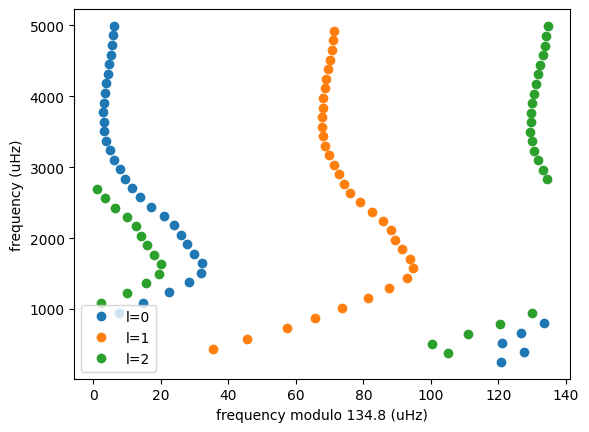

In [6]:
fig = plt.figure()

freq_mod = data.freq.real%nu0
for j in data.l:
    plt.plot(freq_mod.sel(l=j), data.freq.real.sel(l=j), 'o', color=f'C{j:d}', label=f'l={j:d}')
#     plt.plot(freq_mod.sel(l=j)-nu0, ds.freq.real.sel(l=j), 'o', color=f'C{j:d}')

plt.xlabel(f'frequency modulo {nu0:.1f} (uHz)')
plt.ylabel('frequency (uHz)')
plt.legend();

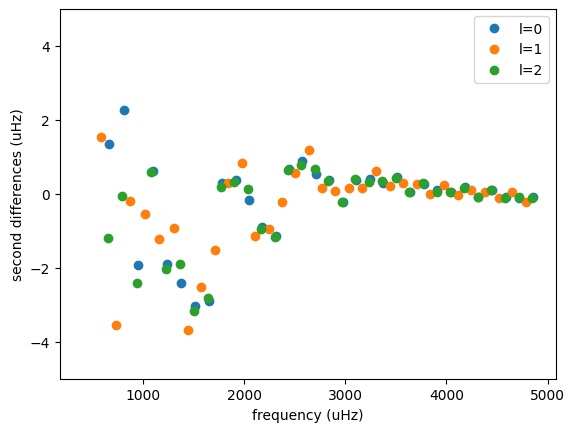

In [7]:
plt.figure()

d2nu = data.freq.real[:-2].values - 2 * data.freq.real[1:-1].values + data.freq.real[2:].values

for j in range(3):
    plt.plot(data.freq.real[1:-1, j], d2nu[:, j], 'o', color=f'C{j:d}', label=f'l={data.l[j]:d}')

plt.xlabel('frequency (uHz)')
plt.ylabel('second differences (uHz)')
plt.ylim(-5, 5)
plt.legend();

In [8]:
l = 0
seed = 2023
rng = random.PRNGKey(seed)

obs = {
    "worst": {"n": np.arange(18, 24)},
    "better": {"n": np.arange(15, 27)},
    "best": {"n": np.arange(12, 30)},
}

sig = {
    "worst": 1.0, 
    "better": 0.1, 
    "best": 0.01
}

for k in obs.keys():
    rng, key = random.split(rng)
    nu_true = data.freq.real.sel(l=l, n_pg=obs[k]["n"]).values
    nu = nu_true + sig[k] * random.normal(key, shape=nu_true.shape)
    
    obs[k]["l"] = np.broadcast_to(l, nu.shape)
    obs[k]["nu_true"] = nu_true
    obs[k]["nu"] = nu
    obs[k]["nu_err"] = np.broadcast_to(sig[k], nu.shape)

In [13]:
for k, v in obs.items():
    df = pd.DataFrame(v)
    df.to_csv(f"data/glitch-inputs-{k}.csv", index=False)

In [9]:
dfs = {k.capitalize(): pd.DataFrame(v) for k, v in obs.items()}

In [75]:
df = pd.concat(dfs).reset_index(1, drop=True).reset_index(names="Case")
df.head()

,Case,n,l,nu_true,nu,nu_err
0,Worst,18,0,2574.262983,2577.249488,1.0
1,Worst,19,0,2706.595870,2706.442841,1.0
2,Worst,20,0,2839.476225,2838.996750,1.0
3,Worst,21,0,2972.726600,2971.452099,1.0
4,Worst,22,0,3105.759219,3107.406018,1.0


In [76]:
dfn = df.set_index("n")
dfp = pd.pivot(df, index="n", columns=["Case"], values="nu")
dfp["Truth"] = dfn.loc[dfn["Case"]=="Best", "nu_true"]
cols = ["Worst", "Better", "Best", "Truth"]
dfp = dfp[cols]

header = r"$\nu_n \, (\mathrm{\mu Hz})$"
dfp.columns = pd.MultiIndex.from_product(
    [[header], dfp.columns], 
)
dfp

$\nu_n \, (\mathrm{\mu Hz})$                                       
Case                        Worst       Better         Best        Truth
n                                                                       
12                            NaN          NaN  1781.726193  1781.729407
13                            NaN          NaN  1914.347592  1914.330420
14                            NaN          NaN  2047.296311  2047.314446
15                            NaN  2180.160168  2180.106980  2180.124902
16                            NaN  2312.001039  2312.030385  2312.029479
17                            NaN  2442.644690  2442.807291  2442.808410
18                    2577.249488  2574.324094  2574.260087  2574.262983
19                    2706.442841  2706.495193  2706.611546  2706.595870
20                    2838.996750  2839.457279  2839.446141  2839.476225
21                    2971.452099  2972.924622  2972.718001  2972.726600
22                    3107.406018  3105.766332  3105.749127  3105.759219
23                    3240.002589  3239.177335  3239.176954  3239.175241
24                            NaN  3372.936800  3372.980470  3372.990030
25                            NaN  3507.219534  3507.114756  3507.112283
26                            NaN  3641.561483  3641.715287  3641.702145
27                            NaN          NaN  3776.338545  3776.350329
28                            NaN          NaN  3911.281113  3911.279131
29                            NaN          NaN  4046.319281  4046.311975

In [77]:
footer = {
    (header, k.capitalize()): {
        "\\midrule%": np.nan,  # Hack to get midrule to render
        "$N$": f"{v['n'].size}",  # Number of radial orders
        r"$\sigma_\mathrm{obs}$": f"{v['nu_err'][0]:.2f}"
    } for k, v in obs.items()
}
footer[(header, "Truth")] = {}

ft = pd.DataFrame(footer).style.format(na_rep="---")
ft

In [78]:
s = dfp.style.format(
    {(header, "Worst"): "{:.1f}", (header, "Better"): "{:.2f}"},
    na_rep="---",
    precision=3
)

s.index.name = "$n$"
s = s.concat(ft)
s

In [84]:
s.to_latex(
    "../tables/glitch-test-obs.tex",
    column_format="c|cccc",
    hrules=True,
    multicol_align="c",
)
s

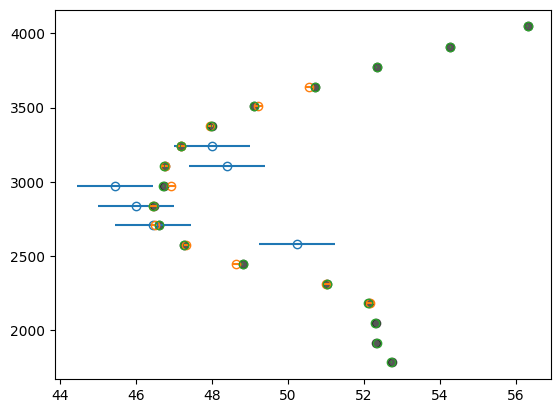

In [66]:
fig, ax = plt.subplots()

delta_nu = 133
nu_true = obs["best"]["nu_true"]
ax.plot(nu_true%delta_nu, nu_true, "ok", alpha=0.66)

for k, v in obs.items():
    ax.errorbar(v["nu"]%delta_nu, v["nu"], xerr=v["nu_err"], fmt="o", markerfacecolor="none")